# Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [3]:
# Importando Libs
import sys
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("algoritmos/")

## Questão 1

In [ ]:
e ai

## Questão 2

In [ ]:
coé

## Questão 3 - Implemente em uma linguagem de programação a sua escolha os algoritmos de ordenação linear CountingSort e BucketSort. Em seguida, trabalhe os itens abaixo.



### a. Analise o comportamento do tempo de execução do algoritmo CountingSort quando o número de elementos da sequência de entrada é aumentado gradativamente. Durante a análise, comente a relação que existe entre o tamanho da sequência de entrada e o elemento de maior valor nessa sequência. Usando dados reais, ilustre graficamente suas conclusões.


In [7]:
from counting_sort import counting_sort
from bucket_sort import bucket_sort

In [81]:
def test_many_arrays(sort_algorithm, size, iterations=3):
    times = np.zeros((iterations,size-2))
    for e in range(2,size):
        for j in range(iterations):
            vetor = np.random.randint(low=0,high=e,size=e)
            times[j,e-2] = sort_algorithm(vetor)[1]
    return np.median(times,axis=0)


def plot_graph(dados, labels, label_x, label_y, title=""):
    for i in range(len(dados)):
        plt.plot(dados[i],label=labels[i])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.legend()
    plt.show

In [115]:
time_counting =  test_many_arrays(counting_sort, 2, 1)
time_bucket = test_many_arrays(bucket_sort, 10000, 1)
dados = [time_bucket, time_counting]
labels = ["Bucket Sort", "Counting Sort"]

KeyboardInterrupt: 

In [ ]:
plot_graph([dados[0]],[labels[0]], "Tamanho da Entrada", "Tempo de Execução em Segundos", "Bucket Sort")


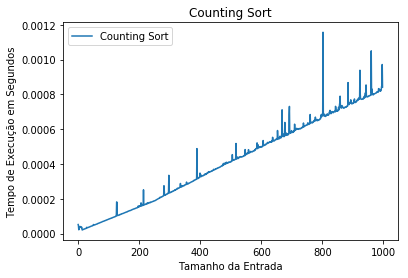

In [92]:
plot_graph([dados[1]],[labels[1]], "Tamanho da Entrada", "Tempo de Execução em Segundos", "Counting Sort")

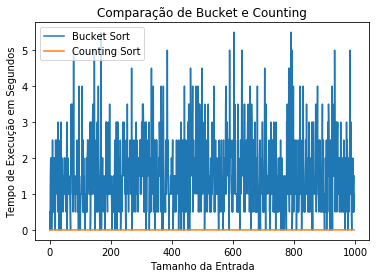

In [82]:
plot_graph([dados[0]],[labels[0]], "Tamanho da Entrada", "Tempo de Execução em Segundos")
plot_graph([dados[1]],[labels[1]], "Tamanho da Entrada", "Tempo de Execução em Segundos", "Comparação de Bucket e Counting")

## Questão 4

In [ ]:
fala